In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# data source: https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes

df = pd.read_excel('/content/drive/My Drive/BTK-Tensorflow/merc.xlsx')
print(df.shape)
df.head()

(13119, 7)


,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          13119 non-null  int64  
 1   price         13119 non-null  int64  
 2   transmission  13119 non-null  object 
 3   mileage       13119 non-null  int64  
 4   tax           13119 non-null  int64  
 5   mpg           13119 non-null  float64
 6   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(1)
memory usage: 717.6+ KB


### Exploratory Data Analysis

In [5]:
import math
def plot_histogram(df):
  num_cols = df.select_dtypes("number").columns
  n_cols = 3
  n_rows = math.ceil(len(num_cols)/n_cols)

  plt.figure(figsize = (5 * n_cols, 4 * n_rows))
  for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"{col}")
    plt.xlabel("")
    plt.ylabel("")

  plt.tight_layout()
  plt.show()

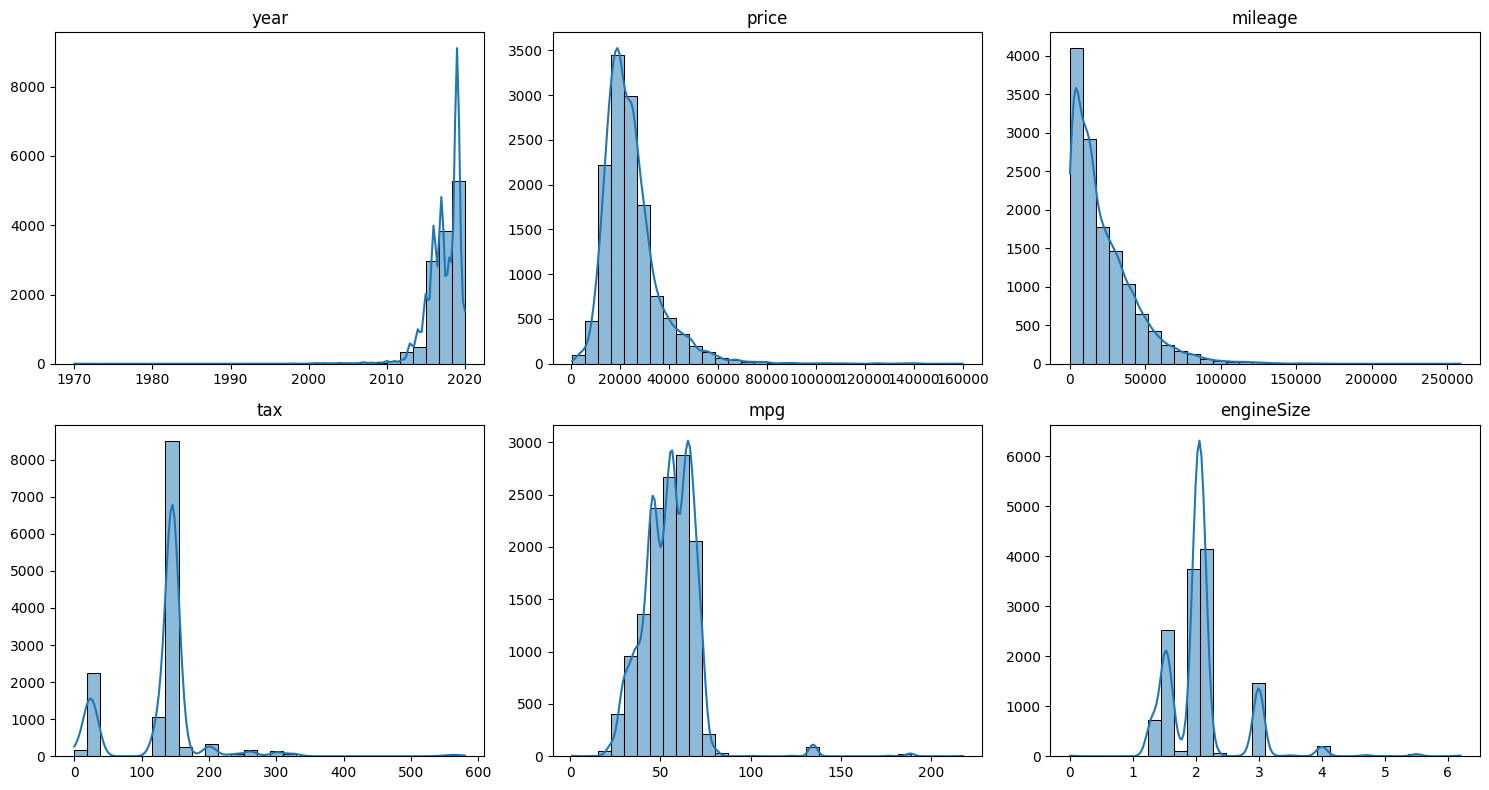

In [6]:
plot_histogram(df)

In [7]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


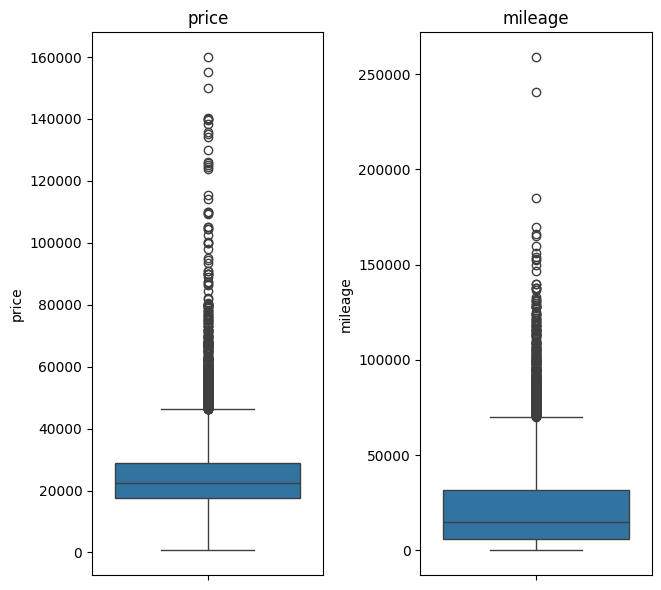

In [8]:
plt.figure(figsize=(10,6))

plt.subplot(1,3,1)
sns.boxplot(df["price"])
plt.title("price")

plt.subplot(1,3,2)
sns.boxplot(df["mileage"])
plt.title("mileage")

plt.tight_layout()
plt.show()

In [9]:
df.transmission.value_counts()

,count
transmission,
Semi-Auto,6848
Automatic,4825
Manual,1444
Other,2


In [10]:
# drop transmission=Other rows
df=df[df["transmission"]!="Other"]

/tmp/ipython-input-2145780557.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="transmission", data=df, palette='pastel', legend=False)


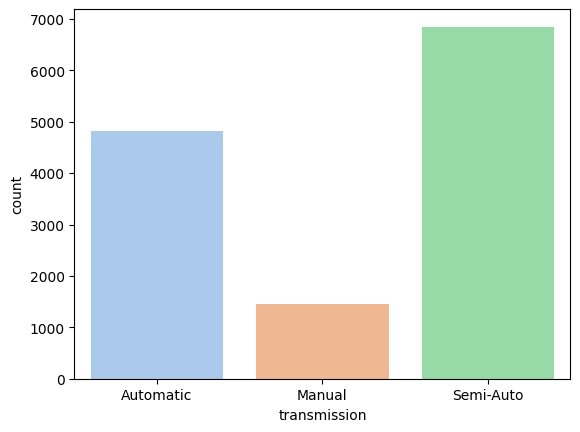

In [11]:
sns.countplot(x="transmission", data=df, palette='pastel', legend=False)
plt.show()

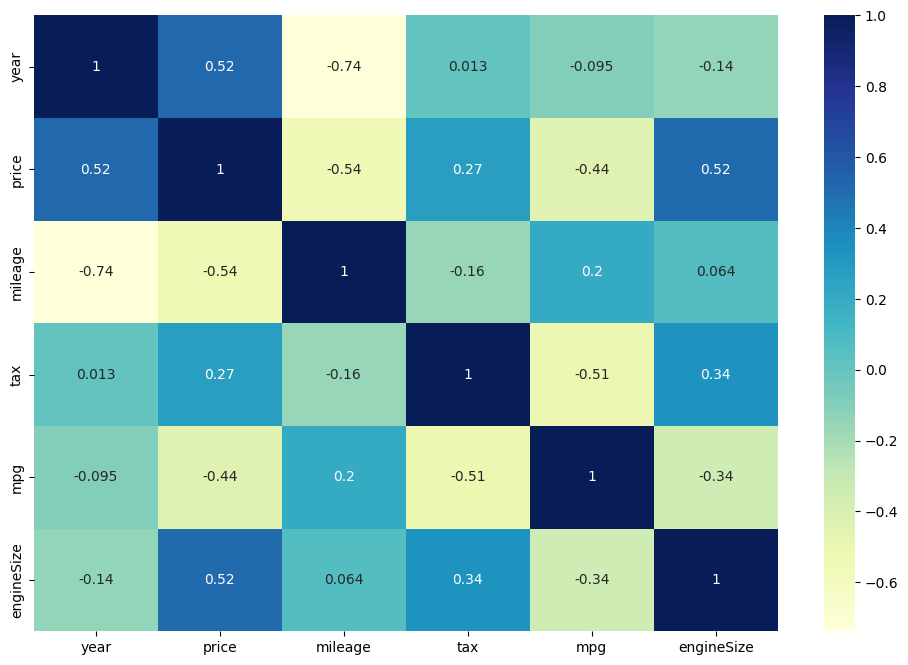

In [12]:
# heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="YlGnBu")
plt.show()

In [13]:
# Let's remove the top 130 cars from the DataFrame.
len(df) * 0.01

131.17000000000002

In [14]:
df=df.sort_values("price", ascending=False).iloc[131:]

/tmp/ipython-input-461755033.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["price"], kde=True, bins=30)


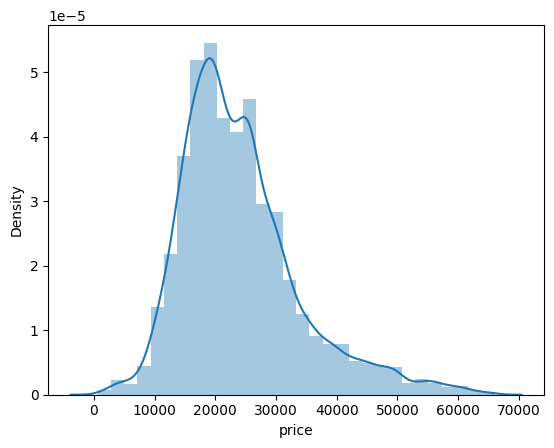

In [15]:
sns.distplot(df["price"], kde=True, bins=30)
plt.show()

In [16]:
df.groupby("year")["price"].mean()

,price
year,
1970,24999.000000
1997,9995.000000
1998,8605.000000
1999,5995.000000
2000,5743.333333
2001,4957.900000
2002,5820.444444
2003,4878.000000
2004,4727.615385


In [17]:
# Let's remove the vehicles from 1970
df = df[df.year != 1970]

In [18]:
# X, y separation and train-test split
from sklearn.model_selection import train_test_split

X = df.drop("price", axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
# one-hot encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    transformers=[
        ("trans", OneHotEncoder(drop="first", handle_unknown="ignore"), ["transmission"])
    ],
    remainder="passthrough"
)


X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [20]:
# scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
feature_names = ct.get_feature_names_out()

X_train = pd.DataFrame(X_train, columns=feature_names)
X_test = pd.DataFrame(X_test, columns=feature_names)

X_train.head()

,trans__transmission_Manual,trans__transmission_Semi-Auto,remainder__year,remainder__mileage,remainder__tax,remainder__mpg,remainder__engineSize
0,-0.350138,-1.050352,-1.054866,1.127325,0.234725,-0.070853,1.778791
1,-0.350138,-1.050352,0.783791,-0.762759,0.234725,-0.845969,-0.095855
2,2.856019,-1.050352,1.243455,-1.046886,0.234725,-1.809809,-1.408107
3,-0.350138,-1.050352,0.783791,-0.718171,0.234725,-0.711166,-0.095855
4,-0.350138,-1.050352,0.324127,-0.279459,0.311406,0.697522,-0.095855


In [25]:
# model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

In [26]:
# training
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    epochs=300,
    batch_size=250,
    )

Epoch 1/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 668780352.0000 - val_loss: 676590720.0000
Epoch 2/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 667192448.0000 - val_loss: 676539200.0000
Epoch 3/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 673582464.0000 - val_loss: 676360960.0000
Epoch 4/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 680080768.0000 - val_loss: 675820288.0000
Epoch 5/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 677880064.0000 - val_loss: 674365760.0000
Epoch 6/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 668549568.0000 - val_loss: 670911616.0000
Epoch 7/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 663524544.0000 - val_loss: 663533056.0000
Epoch 8/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 660739008.0000 - val_loss: 649276800.0000
Epoch 9/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 635308224.0000 - val_loss: 623714304.0000
Epoch 10/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 614794240.0000 - val_loss: 

In [27]:
loss_data = pd.DataFrame(model.history.history)
loss_data.head()

,loss,val_loss
0,677192768.0,676590720.0
1,677159552.0,676539200.0
2,677058432.0,676360960.0
3,676732032.0,675820288.0
4,675808000.0,674365760.0


<Axes: >

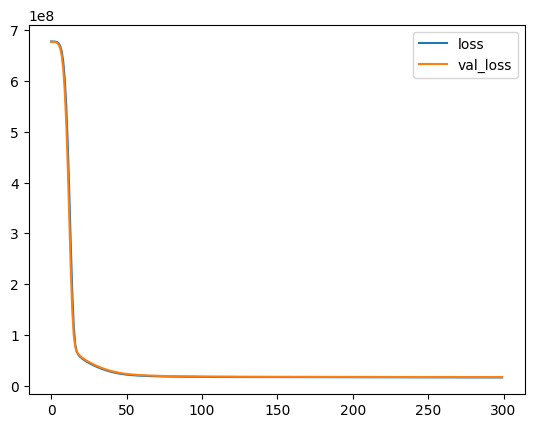

In [28]:
loss_data.plot()

In [29]:
# evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2: ", r2_score(y_test, y_pred))

134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
MAE:  3012.20556640625
MSE:  18010518.0
RMSE:  4243.880064280799
R2:  0.8162628412246704


In [31]:
df.describe()

# ortalama fiyat 24K.
# MAE: 3012.
# yani tahmin edilen değerler ortalama fiyattan yaklaşık 3000 £ sapmakta.
# 3000 / 24000 = 0.125 ~ % 13

,year,price,mileage,tax,mpg,engineSize
count,12985.000000,12985.000000,12985.000000,12985.00000,12985.000000,12985.000000
mean,2017.285791,24076.122988,22131.393685,129.67501,55.438229,2.051213
std,2.189681,9866.769044,21198.448573,65.17219,15.027053,0.532049
min,1997.000000,650.000000,1.000000,0.00000,1.100000,0.000000
25%,2016.000000,17360.000000,6316.000000,125.00000,45.600000,1.700000
50%,2018.000000,22299.000000,15368.000000,145.00000,56.500000,2.000000
75%,2019.000000,28706.000000,31978.000000,145.00000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.00000,217.300000,6.200000


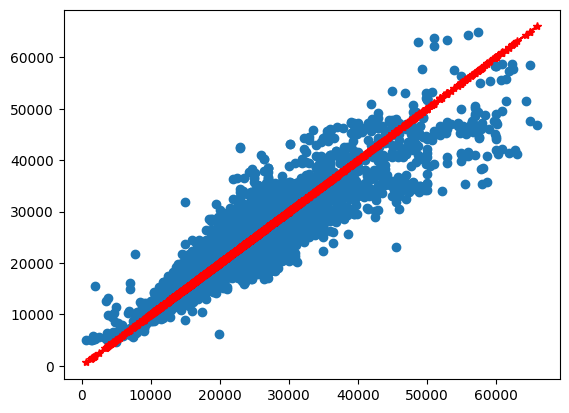

In [32]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, "r-*")

In [38]:
X_test.head()

,trans__transmission_Manual,trans__transmission_Semi-Auto,remainder__year,remainder__mileage,remainder__tax,remainder__mpg,remainder__engineSize
0,-0.350138,0.952062,0.783791,-0.136447,0.311406,0.407697,-0.095855
1,2.856019,-1.050352,-0.135537,-0.262999,1.078220,-0.886410,-0.095855
2,-0.350138,0.952062,-1.054866,2.272987,-1.682309,0.502058,0.091610
3,2.856019,-1.050352,-0.595201,0.190655,-1.682309,0.913207,0.091610
4,-0.350138,0.952062,0.324127,-0.460607,0.311406,0.913207,0.091610


In [45]:
print(df.iloc[2])
print()

# predict
new_car = [0,1,2020,3999,145,28.0,4.0]
new_car = np.array(new_car).reshape(1, -1)

new_car_scaled = scaler.transform(new_car)
print("estimated price of the vehicle:")
model.predict(new_car_scaled)

year                 2020
price               65980
transmission    Semi-Auto
mileage              3999
tax                   145
mpg                  28.0
engineSize            4.0
Name: 3191, dtype: object

estimated price of the vehicle:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


array([[61575.418]], dtype=float32)